# Basics of Logistic Regression

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the Data

In [2]:
# Importing data from csv files
raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/1U52uPJimdoXtNGYXw4CLBsjp8JZsIjxgKZ7_aC7GRDo/export?gid=351344892&format=csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
# Now we will convert the yes and no to 0 and 1 for quantative analysis purpose
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### Plotting the data

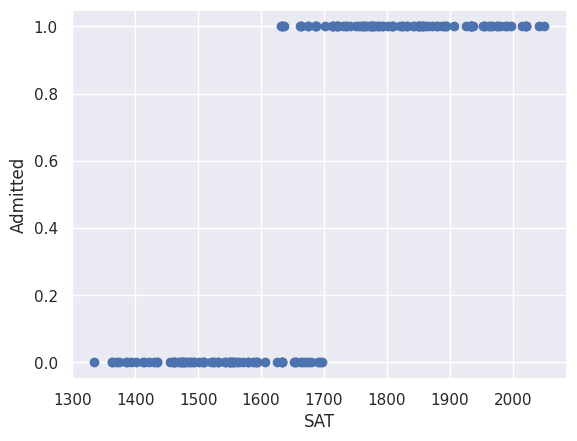

In [4]:
x1 = data['SAT']
y = data['Admitted']
plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show();

### Plot with regression

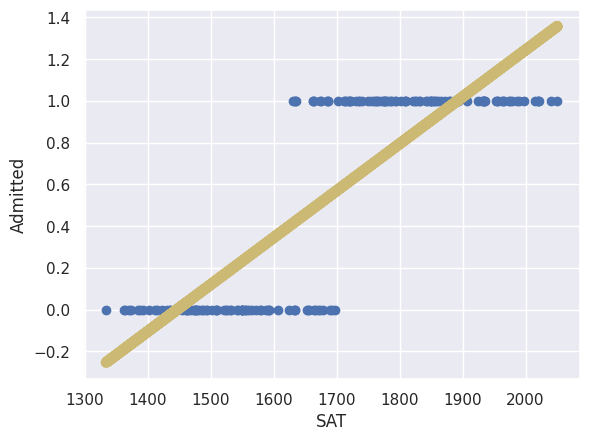

In [5]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
result = reg_lin.fit()

plt.scatter(x1, y)
y_hat = x1*result.params[1] +result.params[0]

plt.plot(x1, y_hat, lw=8, color='C8')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show();

### Plot with Logistic Regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


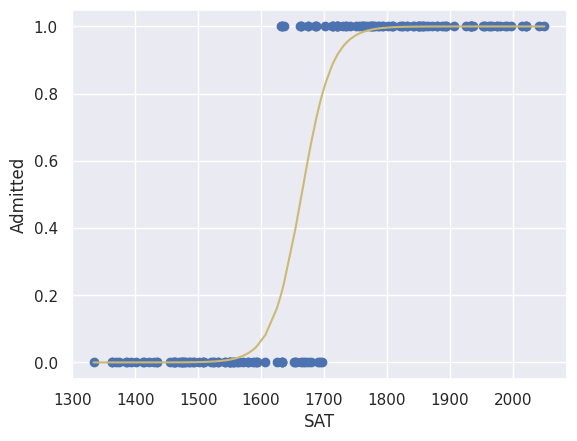

In [6]:
reg_log = sm.Logit(y, x)
log_result = reg_log.fit()

def f(x, b0,b1):
    return np.array(np.exp(b0 + x*b1) / (1 + np.exp(b0 + x*b1)))


f_sorted = np.sort(f(x1, log_result.params[0], log_result.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y)
y_hat = x1*result.params[1] +result.params[0]

plt.plot(x_sorted, f_sorted, color='C8')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show();